In [1]:
import numpy
import pandas as pd
from sklearn import preprocessing
numpy.random.seed(10)

In [2]:
all_df = pd.read_excel("data/car.xlsx")

In [3]:
cols=['class','buying','maint','doors' ,'persons', 'lug_boot',
       'safety',]
all_df=all_df[cols]

In [4]:
all_df[:2]

,class,buying,maint,doors,persons,lug_boot,safety
0,unacc,vhigh,vhigh,2,2,small,low
1,unacc,vhigh,vhigh,2,2,small,med


In [5]:
all_df['buying']= all_df['buying'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int) 
all_df['maint']= all_df['maint'].map({'vhigh':0, 'high': 1, 'med': 2, 'low': 3}).astype(int)
all_df['doors']= all_df['doors'].map({'2':0, '3': 1, '4': 2, '5more': 3}).astype(int)
all_df['persons']= all_df['persons'].map({'2':0, '4': 1, 'more': 2}).astype(int)
all_df['lug_boot']= all_df['lug_boot'].map({'small':0, 'med': 1, 'big': 2}).astype(int)
all_df['safety']= all_df['safety'].map({'low':0, 'med': 1, 'high': 2}).astype(int)
all_df['class']= all_df['class'].map({'unacc':0, 'acc': 1, 'good': 2, 'vgood': 3}).astype(int)

In [6]:
all_df[:4]

,class,buying,maint,doors,persons,lug_boot,safety
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,2
3,0,0,0,0,0,1,0


In [7]:
msk = numpy.random.rand(len(all_df)) < 0.8
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:',len(all_df),
      'train:',len(train_df),
      'test:',len(test_df))

total: 1728 train: 1373 test: 355


In [8]:
trainray= train_df.values
train_Features = trainray[:,1:]
train_Label = trainray[:,0]
    
testray= test_df.values
test_Features = testray[:,1:]
test_Label = testray[:,0]

In [9]:
train_Features[:4]

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 1, 0]])

In [10]:
train_Label[:4]

array([0, 0, 0, 0])

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

Using TensorFlow backend.


In [12]:
model = Sequential()

In [13]:
model.add(Embedding(input_dim=6,output_dim=1))

In [14]:
model.add(SimpleRNN(units=4))

In [15]:
model.add(Dense(1, activation = "sigmoid"))

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 1)           6         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 5         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [18]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.1, 
                         epochs=30, 
                         batch_size=35,verbose=2)

Train on 1235 samples, validate on 138 samples
Epoch 1/30
 - 1s - loss: 0.6811 - acc: 0.6931 - val_loss: 0.7216 - val_acc: 0.5435
Epoch 2/30
 - 0s - loss: 0.6557 - acc: 0.7198 - val_loss: 0.7565 - val_acc: 0.5435
Epoch 3/30
 - 0s - loss: 0.6279 - acc: 0.7198 - val_loss: 0.7726 - val_acc: 0.5000
Epoch 4/30
 - 0s - loss: 0.6011 - acc: 0.7061 - val_loss: 0.7263 - val_acc: 0.4203
Epoch 5/30
 - 0s - loss: 0.5795 - acc: 0.6672 - val_loss: 0.6378 - val_acc: 0.2681
Epoch 6/30
 - 0s - loss: 0.5639 - acc: 0.6405 - val_loss: 0.5849 - val_acc: 0.2681
Epoch 7/30
 - 0s - loss: 0.5548 - acc: 0.6283 - val_loss: 0.5496 - val_acc: 0.1449
Epoch 8/30
 - 0s - loss: 0.5475 - acc: 0.6154 - val_loss: 0.5209 - val_acc: 0.1232
Epoch 9/30
 - 0s - loss: 0.5410 - acc: 0.6121 - val_loss: 0.4871 - val_acc: 0.1232
Epoch 10/30
 - 0s - loss: 0.5329 - acc: 0.6413 - val_loss: 0.4637 - val_acc: 0.1232
Epoch 11/30
 - 0s - loss: 0.5249 - acc: 0.6340 - val_loss: 0.4255 - val_acc: 0.1232
Epoch 12/30
 - 0s - loss: 0.5133 - acc

In [19]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

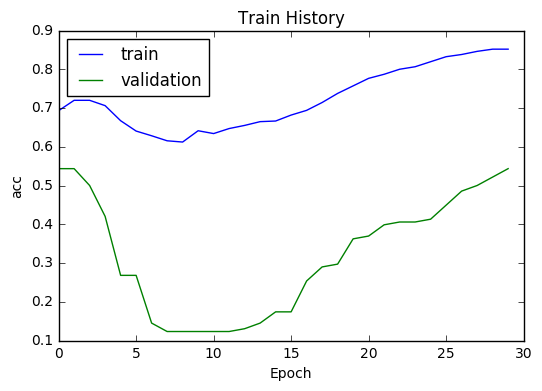

In [20]:
show_train_history(train_history,'acc','val_acc')

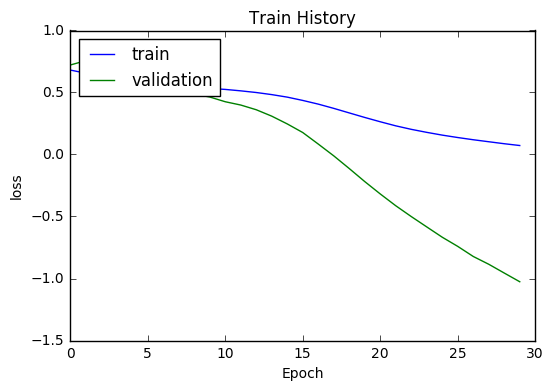

In [21]:
show_train_history(train_history,'loss','val_loss')

In [22]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

355/355 [==============================] - 0s 294us/step


In [23]:
scores[1]

0.7971830986754995